In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles
from sklearn import datasets

#### Example 1

In [2]:
X = np.array([[1,2],[3,4],[5,6]])

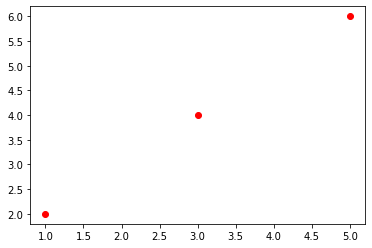

In [3]:
plt.scatter(X[:, 0], X[:, 1],c='r');

In [4]:
pca = PCA(n_components=2)

In [5]:
pca.fit(X)

PCA(n_components=2)

In [6]:
X_pca = pca.transform(X)

In [7]:
pca.explained_variance_ 

array([8.00000000e+00, 2.25080839e-33])

In [8]:
pca.components_                             

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

#### Example 2

In [9]:
rng = np.random.RandomState(1)
a = rng.rand(2, 2)
a

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01]])

In [10]:
b = rng.randn(2, 200)

In [11]:
X = np.dot(a, b).T
X.shape

(200, 2)

In [12]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

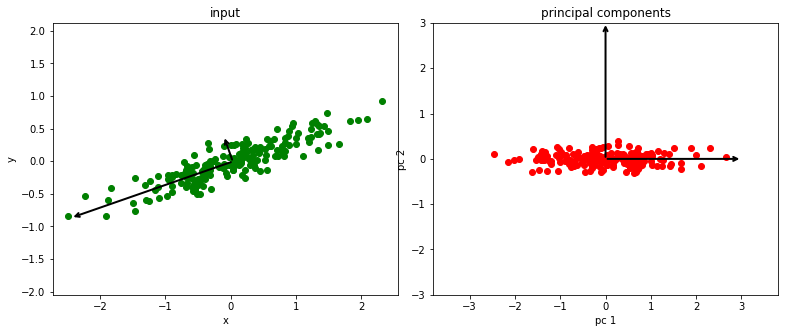

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.1)

ax[0].scatter(X[:, 0], X[:, 1],c='g');

for length, vector in zip(pca.explained_variance_,pca.components_   ):
    v = vector * 3 * np.sqrt(length)
    ax[0].annotate('', pca.mean_+v , pca.mean_ , arrowprops = dict(arrowstyle='->',linewidth=2))
    
    
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')


# plot principal components
ax[1].scatter(X_pca[:, 0], X_pca[:, 1],c='r')

ax[1].annotate('', [0, 3], [0, 0], arrowprops = dict(arrowstyle='->', linewidth=2))
ax[1].annotate('', [3, 0], [0, 0], arrowprops = dict(arrowstyle='->', linewidth=2))

ax[1].axis('equal')
ax[1].set(xlabel='pc 1', ylabel='pc 2', title='principal components', xlim=(-5, 5), ylim=(-3, 3));


In [14]:
pca.explained_variance_       

array([0.7625315, 0.0184779])

In [15]:
pca.components_                                   

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

#### Example 3

In [18]:
X, y = make_circles(n_samples=1000,random_state=123, noise=0.1, factor=0.2)
X.shape

(1000, 2)

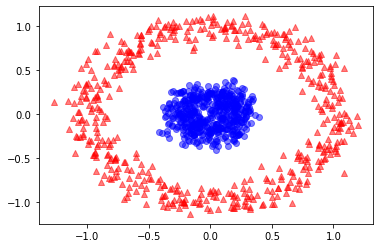

In [19]:
plt.scatter(X[y==0, 0], X[y==0, 1] ,color='red', marker='^', alpha=0.5)

plt.scatter(X[y==1, 0], X[y==1, 1] ,color='blue', marker='o', alpha=0.5)

In [20]:
pca = PCA(n_components=2)

In [21]:
PCA = pca.fit_transform(X)

Text(0.5, 0, 'PC1')

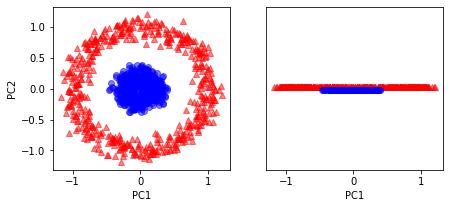

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(PCA[y==0, 0], PCA[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(PCA[y==1, 0], PCA[y==1, 1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(PCA[y==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(PCA[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

#### Example 4

In [26]:
iris = datasets.load_iris()

In [27]:
pca = PCA(n_components=2)
pca.fit(iris.data)

PCA(n_components=2)

In [28]:
X_pca =pca.transform(iris.data)

Text(0, 0.5, 'Sepal width')

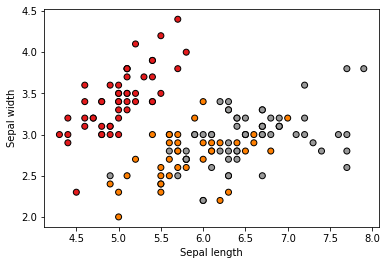

In [29]:
x = iris.data[:, :2] 
y = iris.target
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

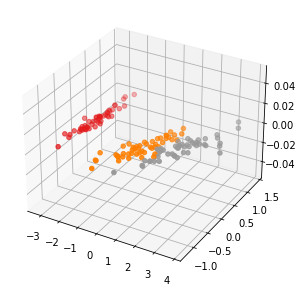

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y , cmap=plt.cm.Set1);

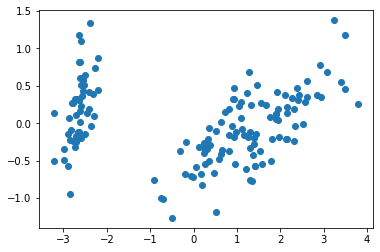

In [31]:
plt.scatter(X_pca[:, 0], X_pca[:, 1]);

#### Example 5

In [32]:
np.random.seed(42)
experience = np.random.normal(size=100)

In [33]:
salary = 1500 + experience + np.random.normal(size=100, scale=.5)

In [34]:
X = np.column_stack([experience, salary])
X.shape

(100, 2)

In [35]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [36]:
pca.explained_variance_ratio_

array([0.93646607, 0.06353393])

In [37]:
PC = pca.transform(X)

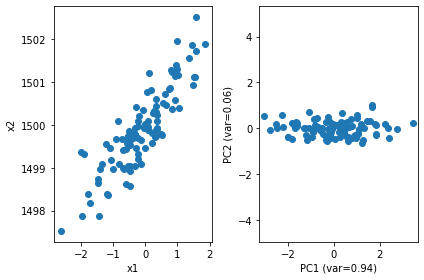

In [38]:
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1"); 
plt.ylabel("x2")

plt.subplot(122)
plt.scatter(PC[:, 0], PC[:, 1])
plt.xlabel("PC1 (var=%.2f)" % pca.explained_variance_ratio_[0])
plt.ylabel("PC2 (var=%.2f)" % pca.explained_variance_ratio_[1])

plt.axis('equal')
plt.tight_layout()